In [1]:
import os
import pandas as pd
import numpy as np
import lux
import re
import dtale
import dtale.app as dtale_app
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
plt.style.use('classic')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pydotplus
from six import StringIO

In [70]:
a=121
num=0
while(a>0):
    re= a%10
    num= num*10+re
    a=a/10
print(num)

inf


In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv', encoding='windows-1252')

In [3]:
data.head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [6]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 7
Integer variables: 0
Float variables: 2


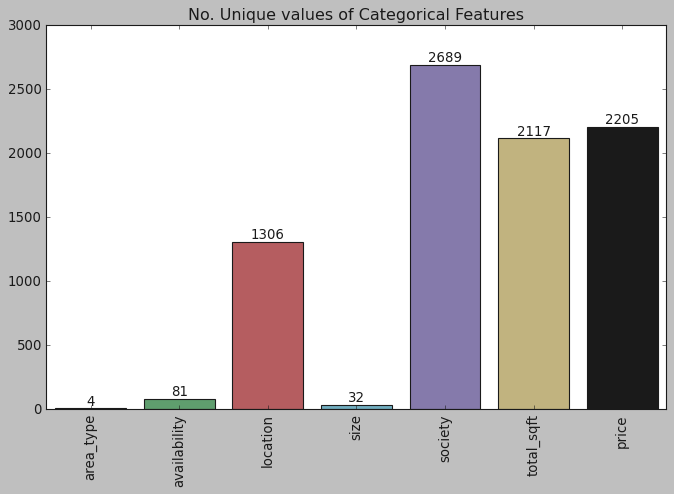

In [7]:
unique_values = []
for col in object_cols:
    unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
ax=sns.barplot(x=object_cols,y=unique_values)
ax.bar_label(ax.containers[0])
plt.show()

In [8]:
dtale.show(data)

In [9]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
data['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype='<U20')

In [11]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype='<U20')

In [12]:
data['area_type'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
data['price'] = data['price'].str.replace(r'[^\d\-+\.]', '')

In [14]:
data.head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
data=data.drop(['society', 'availability', 'area_type', 'balcony'],axis=1)

In [16]:
data.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
data=data.dropna()

In [19]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [20]:
data.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [21]:
for i in data.select_dtypes("O").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################  

location


Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64
#######################  

size


2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: in

# Cleaning Size Column 

In [22]:
data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  object 
 5   BHK         13246 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 724.4+ KB


In [24]:
data.head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [25]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
data[~data['total_sqft'].apply(isfloat)].head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [27]:
def convert_avg_value(x):
    avg_value=x.split('-')
    if len(avg_value)==2:
        return (float(avg_value[0])+float(avg_value[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
data['total_sqft']=data['total_sqft'].apply(convert_avg_value)

In [29]:
data[~data['total_sqft'].apply(isfloat)].head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [30]:
data[~data['price'].apply(isfloat)].head(25)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
data['price']=data['price'].apply(convert_avg_value)

In [32]:
data[~data['price'].apply(isfloat)].head(25)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
data['price_per_sqft']=data['price']*80/data['total_sqft']
data.head(15)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

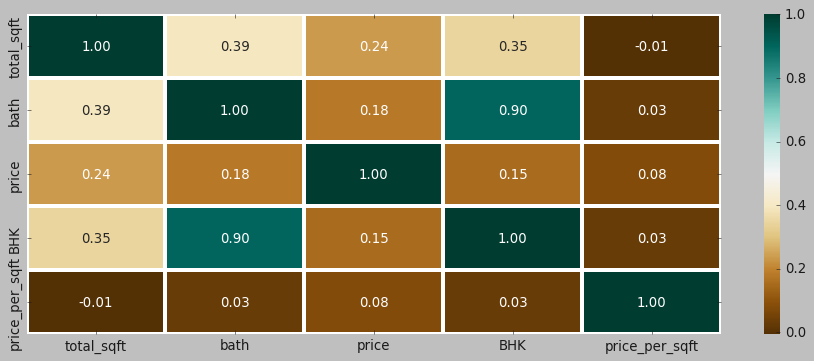

In [34]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,annot=True)
plt.show()

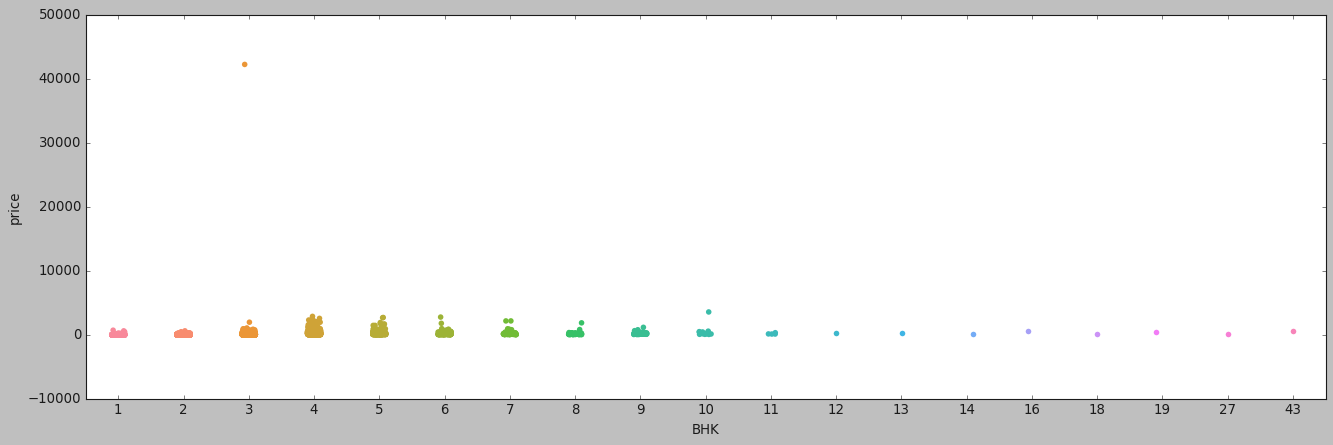

In [35]:
plt.figure( figsize = (20, 6) )

sns.stripplot( x = data['BHK'], y = data['price'] )

plt.show()

# remove Outliers 

<AxesSubplot:>

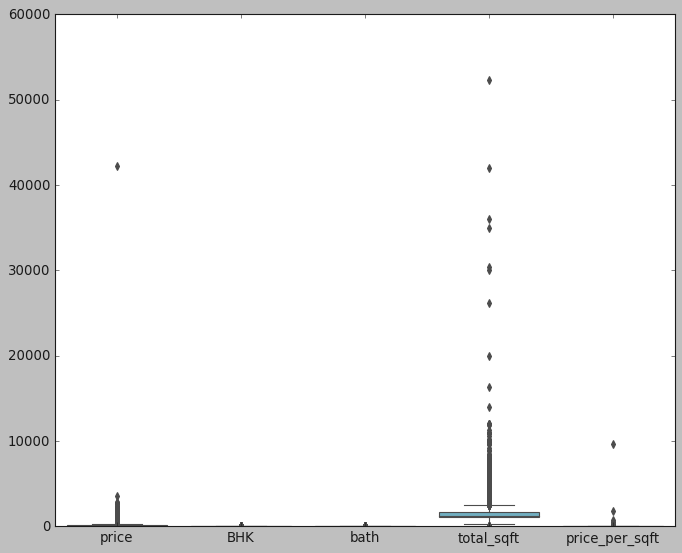

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data[['price', 'BHK', 'bath', 'total_sqft', 'price_per_sqft']])

# Total Sq. Feet more then 8000

<AxesSubplot:>

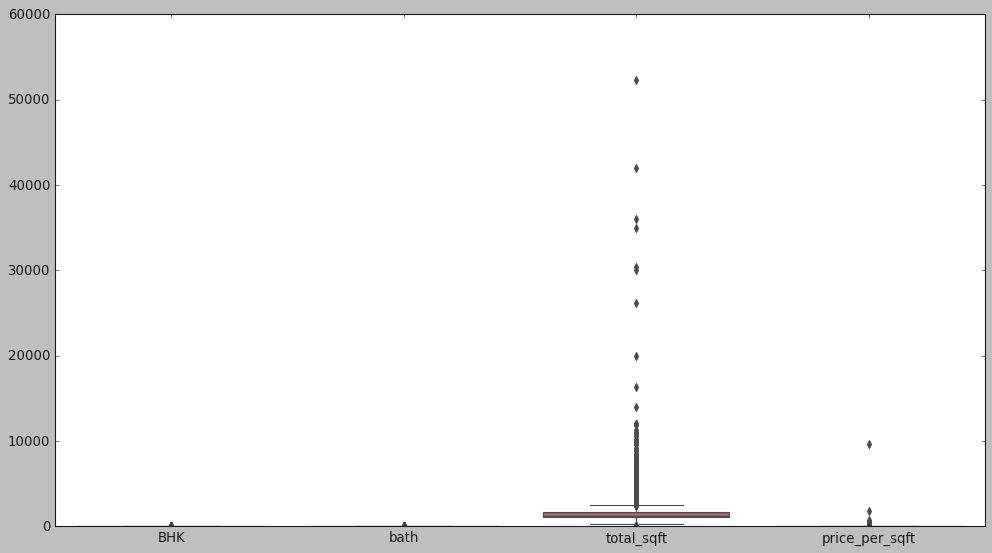

In [37]:
f, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data[['BHK', 'bath', 'total_sqft', 'price_per_sqft']])

In [38]:
outlier_index = data[(data.total_sqft > 8000)].index
data.drop(outlier_index, axis=0, inplace=True)

<AxesSubplot:>

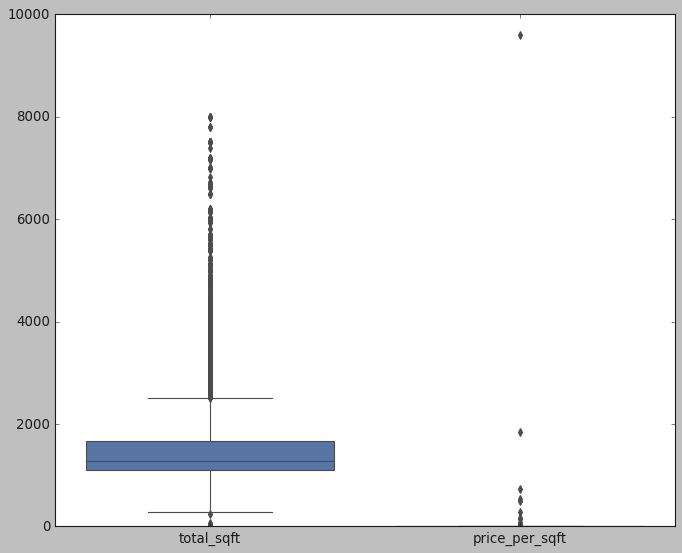

In [39]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data[['total_sqft', 'price_per_sqft']])

In [40]:
outlier_index = data[(data.price_per_sqft > 8000)].index
data.drop(outlier_index, axis=0, inplace=True)

<AxesSubplot:>

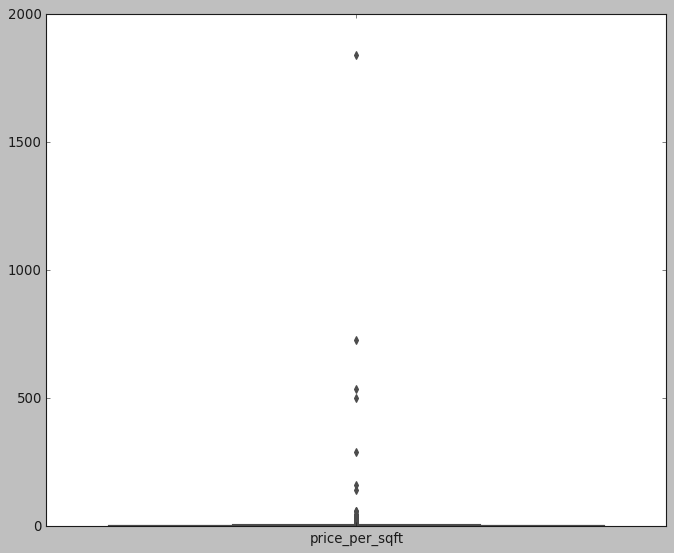

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data[['price_per_sqft']])

<AxesSubplot:>

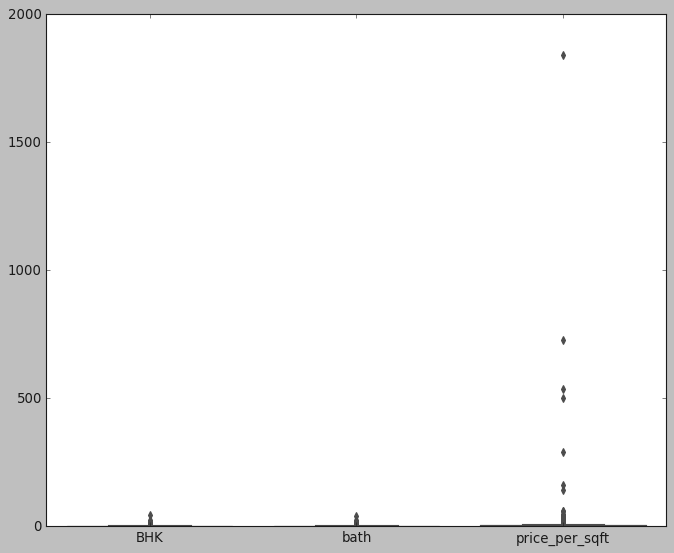

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data[['BHK', 'bath', 'price_per_sqft']])

# removing Outlier From BHK And Bath

<AxesSubplot:>

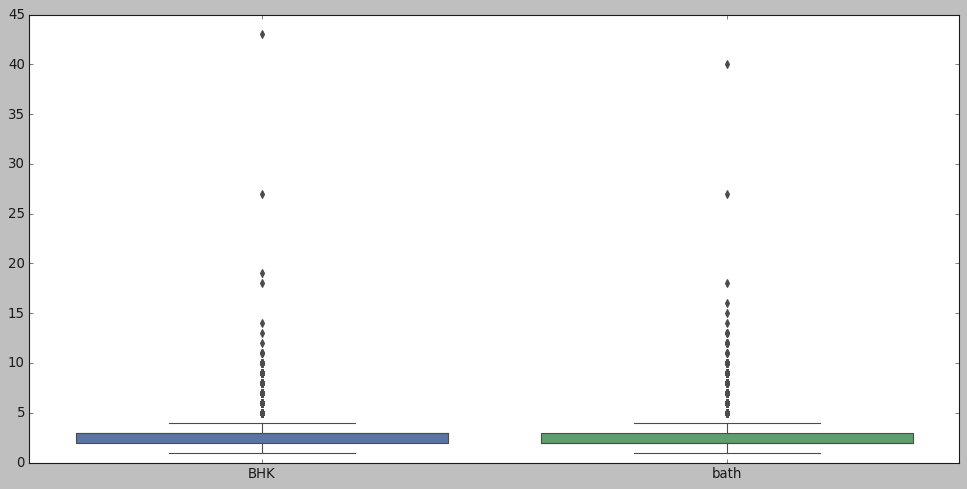

In [43]:
f, ax = plt.subplots(figsize=(15, 7))
sns.boxplot(data=data[['BHK', 'bath']])

In [44]:
outlier_index = data[(data.BHK > 6)].index
data.drop(outlier_index, axis=0, inplace=True)

In [45]:
outlier_index = data[(data.bath > 6)].index
data.drop(outlier_index, axis=0, inplace=True)

<AxesSubplot:>

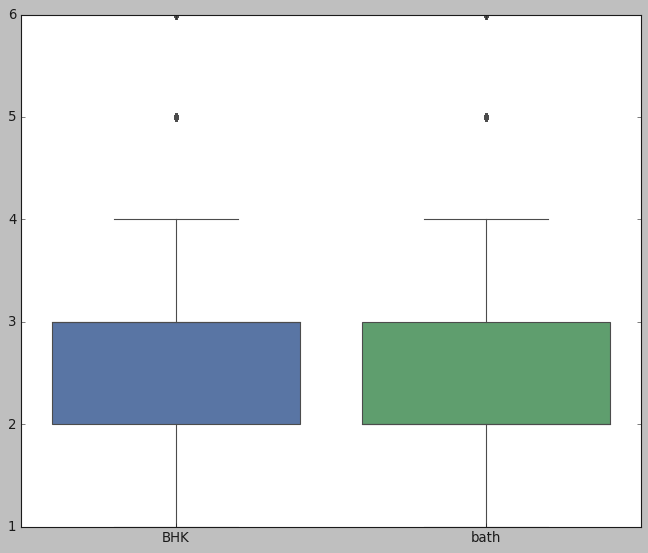

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data[['BHK', 'bath']])

In [47]:
data.shape

(12900, 7)

In [48]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [49]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 12900 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12900 non-null  object 
 1   size            12900 non-null  object 
 2   total_sqft      12857 non-null  float64
 3   bath            12900 non-null  float64
 4   price           12900 non-null  float64
 5   BHK             12900 non-null  int64  
 6   price_per_sqft  12857 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 806.2+ KB


In [50]:
data=data.drop(['size'],axis=1)

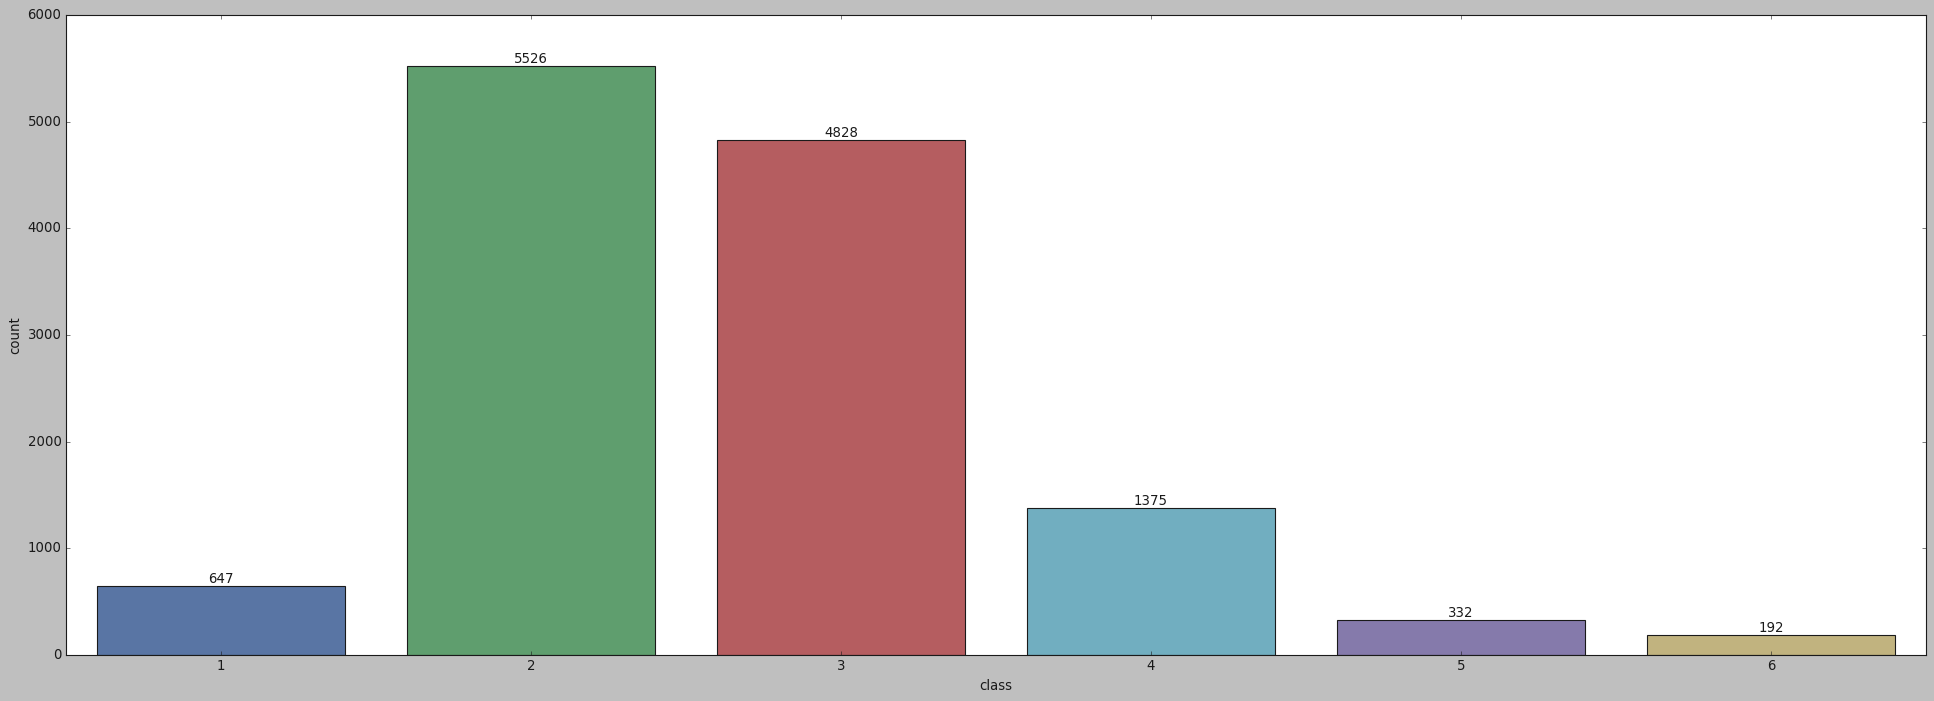

In [51]:
plt.figure(figsize=(30,10))
class_data=data["BHK"].value_counts().reset_index()
class_data.columns=["class","count"]
xticks(rotation=0)
ax=sns.barplot(x="class",y="count",data=class_data)
ax.bar_label(ax.containers[0])
plt.show()

In [52]:
data.columns

Index(['location', 'total_sqft', 'bath', 'price', 'BHK', 'price_per_sqft'], dtype='object')

In [53]:
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])
data['total_sqft'] = le.fit_transform(data['total_sqft'])
data['bath'] = le.fit_transform(data['bath'])
data['price'] = le.fit_transform(data['price'])
data['BHK'] = le.fit_transform(data['BHK'])
data['price_per_sqft'] = le.fit_transform(data['price_per_sqft'])

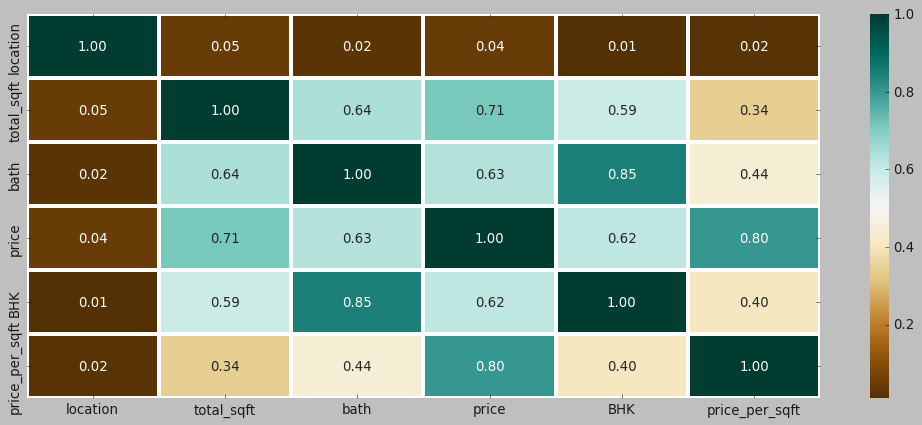

In [54]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,annot=True)
plt.show()

In [55]:
x = data.drop(['price'], axis=1)
y = data[['price']]

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# model

In [58]:
from sklearn.linear_model import Lasso
lrr= Lasso()
lasso = lrr.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
y_pred_train = lasso.predict(x_train)

print("***************************************************Report MSE & RMSE**************************************************")
y_pred = lasso.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(lasso, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(lasso, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
lasso_train=lasso.score(x_train, y_train)
print("Training score: ",lasso_train)
lasso_test = lasso.score(x_test, y_test)
print("Testing score: ",lasso_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 36671.66578721884
RMSE : 191.49847463418303
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.8677029087193878
Cross Validation Testing Score 0.8597442349560854
***************************************************Report Training And Testing Score**********************************
Training score:  0.8679960430965685
Testing score:  0.8601543568806462


In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=35,max_depth=40,max_leaf_nodes=200)
dt=dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
y_pred_train=dtr.predict(x_train)
print("***************************************************Report MSE & RMSE**************************************************")
y_pred = dt.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(dt, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(dt, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
dt_train=dt.score(x_train, y_train)
print("Training score: ",dt_train)
dt_test = dt.score(x_test, y_test)
print("Testing score: ",dt_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 4649.588698200676
RMSE : 68.187892607124
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9845332839689359
Cross Validation Testing Score 0.9765410657632205
***************************************************Report Training And Testing Score**********************************
Training score:  0.9949575660857107
Testing score:  0.9822690159341773


In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lmodel = lm.fit(x_train, y_train)
print("***************************************************Report*************************************************************")
y_pred = lmodel.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(lmodel, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(lmodel, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
lmodel_train=lmodel.score(x_train, y_train)
print("Training score: ",lmodel_train)
lmodel_test = lmodel.score(x_test, y_test)
print("Testing score: ",lmodel_test)

***************************************************Report*************************************************************
MSE : 36595.20989740632
RMSE : 191.29874515376812
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.8677754346774836
Cross Validation Testing Score 0.8598053769936094
***************************************************Report Training And Testing Score**********************************
Training score:  0.8680712397129522
Testing score:  0.8604459177588222


In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
print("***************************************************Report*************************************************************")
y_pred = rfr.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(rfr, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(rfr, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
rfr_train=rfr.score(x_train, y_train)
print("Training score: ",rfr_train)
rfr_test = rfr.score(x_test, y_test)
print("Testing score: ",rfr_test)

***************************************************Report*************************************************************
MSE : 3375.7578739821274
RMSE : 58.10127256766523
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9946474890842392
Cross Validation Testing Score 0.9865362955863496
***************************************************Report Training And Testing Score**********************************
Training score:  0.9993329026584735
Testing score:  0.9871267088426949


In [62]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb1=xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
y_pred_train=xgb.predict(x_train)
print("***************************************************Report*************************************************************")
y_pred = xgb1.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(xgb1, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(xgb1, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
xgb1_train=xgb1.score(x_train, y_train)
print("Training score: ",xgb1_train)
xgb1_test = xgb1.score(x_test, y_test)
print("Testing score: ",xgb1_test)

***************************************************Report*************************************************************
MSE : 3322.539437863905
RMSE : 57.64147324508548
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.993639450057963
Cross Validation Testing Score 0.9862734540767356
***************************************************Report Training And Testing Score**********************************
Training score:  0.9996966454489832
Testing score:  0.9873296548028796


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(x_train, y_train)
print("***************************************************Report*************************************************************")
y_pred = gbm.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(gbm, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(gbm, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
gbm_train=gbm.score(x_train, y_train)
print("Training score: ",gbm_train)
gbm_test = gbm.score(x_test, y_test)
print("Testing score: ",gbm_test)

***************************************************Report*************************************************************
MSE : 3576.803125059012
RMSE : 59.8063803039359
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.9916130502530104
Cross Validation Testing Score 0.9820357066071038
***************************************************Report Training And Testing Score**********************************
Training score:  0.9946264270348394
Testing score:  0.9863600323956506


In [64]:
from sklearn.ensemble import AdaBoostRegressor
abdc=AdaBoostRegressor(random_state=70, n_estimators=20, learning_rate=1)
abdc1=abdc.fit(x_train,y_train)
y_pred=abdc.predict(x_test)
y_pred_train=abdc.predict(x_train)
print("***************************************************Report MSE & RMSE**************************************************")
y_pred = abdc1.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(abdc1, x_train, y_train, cv=10, scoring='r2').mean()
cv_score2 = cross_val_score(abdc1, x_test, y_test, cv=10, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
abdc1_train=abdc1.score(x_train, y_train)
print("Training score: ",abdc1_train)
abdc1_test = abdc1.score(x_test, y_test)
print("Testing score: ",abdc1_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 31675.562101847274
RMSE : 177.97629646064465
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.8943004781577271
Cross Validation Testing Score 0.8744733131907327
***************************************************Report Training And Testing Score**********************************
Training score:  0.8926100158796132
Testing score:  0.8792067592728843


In [65]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
NB=nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
y_pred_train=nb.predict(x_train)

print("***************************************************Report MSE & RMSE**************************************************")
y_pred = NB.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(NB, x_train, y_train, cv=8, scoring='r2').mean()
cv_score2 = cross_val_score(NB, x_test, y_test, cv=8, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
NB_train=abdc1.score(x_train, y_train)
print("Training score: ",NB_train)
NB_test = abdc1.score(x_test, y_test)
print("Testing score: ",NB_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 57106.6
RMSE : 238.96987257811392
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.7442385308581422
Cross Validation Testing Score 0.6591645405762966
***************************************************Report Training And Testing Score**********************************
Training score:  0.8926100158796132
Testing score:  0.8792067592728843


In [66]:
from sklearn.svm import SVR
svc=SVR()
SVM=svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred_train=svc.predict(x_train)
print("***************************************************Report MSE & RMSE**************************************************")
y_pred = SVM.predict(x_test)
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
print("***************************************************Report Cross Validation********************************************")
cv_score1 = cross_val_score(SVM, x_train, y_train, cv=8, scoring='r2').mean()
cv_score2 = cross_val_score(SVM, x_test, y_test, cv=8, scoring='r2').mean()
print("Cross Validation Training Score", cv_score1)
print("Cross Validation Testing Score", cv_score2)
print("***************************************************Report Training And Testing Score**********************************")
SVM_train=SVM.score(x_train, y_train)
print("Training score: ",SVM_train)
SVM_test = SVM.score(x_test, y_test)
print("Testing score: ",SVM_test)

***************************************************Report MSE & RMSE**************************************************
MSE : 43127.15715147656
RMSE : 207.67079031841854
***************************************************Report Cross Validation********************************************
Cross Validation Training Score 0.8343988456515469
Cross Validation Testing Score 0.5396695563725136
***************************************************Report Training And Testing Score**********************************
Training score:  0.8496195733873364
Testing score:  0.8355366493915936
